# Regresyon Modelleri Kullanılarak Sigorta Maliyeti Tahmini

## Giriş

Sağlık sigortası maliyetlerinin doğru bir şekilde tahmin edilmesi, sigorta şirketleri açısından
risk yönetimi, fiyatlandırma ve müşteri segmentasyonu gibi birçok kritik süreçte önemli rol oynamaktadır.
Bireylerin yaşı, vücut kitle indeksi (BMI), sigara kullanımı, çocuk sayısı ve yaşadıkları bölge gibi
faktörler, sigorta maliyetlerini doğrudan etkileyen temel değişkenler arasında yer almaktadır.

Bu çalışmada, bireylerin demografik ve sağlıkla ilgili özellikleri kullanılarak
yıllık sağlık sigortası maliyetlerinin tahmin edilmesi amaçlanmıştır.
Problem, sürekli bir hedef değişkenin tahmin edilmesini içerdiği için
bir regresyon problemi olarak ele alınmıştır.

Çalışmada kullanılan veri seti, bireylere ait temel demografik bilgiler ile
sigorta maliyetlerini içermektedir.
Veri seti üzerinde keşifsel veri analizi (EDA) gerçekleştirilmiş,
veri ön işleme adımları uygulanmış ve farklı regresyon modelleri kullanılarak
sigorta maliyetleri tahmin edilmiştir.
Elde edilen sonuçlar, modellerin performansını değerlendirmek amacıyla
uygun hata metrikleri kullanılarak analiz edilmiştir.

Bu proje, makine öğrenmesi tabanlı regresyon modellerinin
gerçek hayattaki maliyet tahmin problemlerine nasıl uygulanabileceğini
göstermeyi amaçlamaktadır.


## Veri Seti Hakkında Bilgi

Bu projede kullanılan veri seti, Kaggle platformunda paylaşılan
Medical Cost Personal Dataset’tir.
Veri seti, bireylerin demografik ve sağlıkla ilgili özellikleri ile
yıllık sağlık sigortası maliyetlerini içermektedir.

Veri setinde yer alan değişkenler aşağıdaki gibidir:

** age: Bireyin yaşı

** sex: Bireyin cinsiyeti

** bmi: Vücut kitle indeksi

** children: Bireyin sahip olduğu çocuk sayısı

** smoker: Sigara kullanma durumu

** region: Bireyin yaşadığı bölge

** charges: Yıllık sağlık sigortası maliyeti (hedef değişken)

Veri seti, hem kategorik hem de sayısal değişkenler içermesi nedeniyle
regresyon problemleri için uygun bir yapı sunmaktadır.

### Kullanılan Kütüphaneler

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


#### Veri Setinin Yüklenmesi ve İlk İnceleme


In [2]:
df=pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Keşifsel Veri Analizi (EDA)

**** Veri Seti Boyutu

In [4]:
df.shape

(1338, 7)

**** Eksik Değer Analizi

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**** Temel İstatistikler

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Temel İstatistiklerin Yorumlanması

Temel istatistikler incelendiğinde, veri setinin 1338 gözlemden oluştuğu görülmektedir.
Bireylerin yaş ortalaması yaklaşık 39 olup, veri seti genç ve orta yaş gruplarını ağırlıklı olarak içermektedir.
BMI değerlerinin ortalamasının 30 civarında olması, veri setinde fazla kilolu bireylerin önemli bir yer tuttuğunu göstermektedir.

Sigorta maliyetleri (charges) incelendiğinde, minimum ve maksimum değerler arasında oldukça geniş bir aralık olduğu dikkat çekmektedir.
Bu durum, bireylerin sağlık durumu ve yaşam tarzı gibi faktörlerin sigorta maliyetleri üzerinde güçlü bir etkisi olduğunu düşündürmektedir.
Veri setindeki bu çeşitlilik, sigorta maliyetlerini tahmin etmek için regresyon modellerinin uygulanması açısından uygun bir yapı sunmaktadır.


#### EDA – Sigara Kullanımı ve Sigorta Maliyeti İlişkisi

EDA kapsamında, sigara kullanım durumunun sigorta maliyetleri üzerindeki etkisi incelenmiştir.
Bu analiz, yaşam tarzı faktörlerinin maliyetler üzerindeki etkisini gözlemlemek amacıyla yapılmıştır.


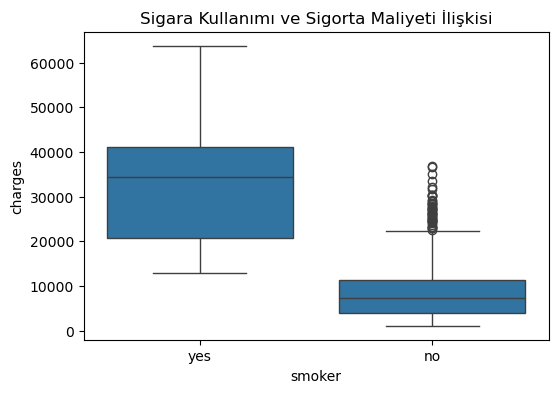

In [7]:
plt.figure(figsize=(6,4))
sns.boxplot(x="smoker", y="charges", data=df)
plt.title("Sigara Kullanımı ve Sigorta Maliyeti İlişkisi")
plt.show()

**** Grafik incelendiğinde, sigara kullanan bireylerin sigorta maliyetlerinin,
sigara kullanmayan bireylere kıyasla belirgin şekilde daha yüksek olduğu görülmektedir.
Bu durum, sigara kullanımının sigorta maliyetlerini etkileyen en önemli faktörlerden biri olduğunu göstermektedir.


### Veri Ön İşleme

Bu aşamada, modelleme öncesinde veri seti makine öğrenmesi algoritmalarına uygun hale getirilmiştir.
Kategorik değişkenler sayısal forma dönüştürülmüş ve modelleme için gerekli veri ayrımları yapılmıştır.


####  Kategorik Değişkenleri Dönüştürüyoruz

Veri setinde yer alan kategorik değişkenler, regresyon modellerinde kullanılabilmesi için
sayısal değişkenlere dönüştürülmüştür.


In [8]:
df_encoded=pd.get_dummies(df, drop_first=True)

**** Kategorik değişkenler, one-hot encoding yöntemi ile modele uygun hale getirilmiştir.

#### Bağımsız ve Hedef Değişkenleri Ayırıyoruz

Modelleme sürecinde kullanılacak bağımsız değişkenler ile hedef değişken bu adımda ayrıştırılmıştır.


In [9]:
x=df_encoded.drop('charges', axis=1)
y=df_encoded['charges']

**** Sigorta maliyetleri hedef değişken olarak belirlenmiştir.

#### Eğitim ve Test Verisini Ayırıyoruz

Model performansını değerlendirmek amacıyla veri seti eğitim ve test alt kümelerine ayrılmıştır.


In [10]:
x_train, x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=42)

**** Veri setinin %80’i eğitim, %20’si test verisi olarak ayrılmıştır.

## Modelleme

Bu bölümde, sigorta maliyetlerini tahmin etmek amacıyla doğrusal regresyon modeli kullanılmıştır.
Doğrusal regresyon modeli, basit ve yorumlanabilir bir yaklaşım sunduğu için ilk model olarak tercih edilmiştir.


In [11]:
lr_model=LinearRegression()

In [12]:
lr_model.fit(x_train, y_train)

LinearRegression()

**** Doğrusal regression modeli eğitim verisi kullanılarak eğitilmiştir.

#### Test Verisi Üzerinde Tahmin Yapıyoruz

Eğitilen model kullanılarak test verisi üzerinde tahminler gerçekleştirilmiştir.


In [13]:
lr_pred=lr_model.predict(x_test)

#### Model Değerlendirme

Bu aşamada, doğrusal regresyon modelinin test verisi üzerindeki performansı
hata metrikleri kullanılarak değerlendirilmiştir.


In [14]:
lr_mse = mean_squared_error(y_test, lr_pred)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_test, lr_pred)

In [15]:
lr_mse

33596915.85136146

In [16]:
lr_r2

0.7835929767120723

Doğrusal regresyon modeli için elde edilen RMSE değeri yaklaşık 33.596 olarak hesaplanmıştır.
Bu değer, modelin sigorta maliyetlerini tahmin ederken ortalama hata payının yüksek olduğunu göstermektedir.

R² skorunun yaklaşık 0.78 olması, sigorta maliyetlerindeki değişimin %78’inin model tarafından
açıklanabildiğini ifade etmektedir.
Bu sonuçlar, doğrusal regresyon modelinin temel bir yaklaşım sunduğunu ancak
daha karmaşık ilişkileri yakalamakta sınırlı kaldığını göstermektedir.


#### Linear Regression – Gerçek ve Tahmin Edilen Değerlerin Karşılaştırılması

Doğrusal regresyon modeli tarafından tahmin edilen sigorta maliyetleri ile
gerçek değerler karşılaştırılarak modelin performansı görsel olarak incelenmiştir.


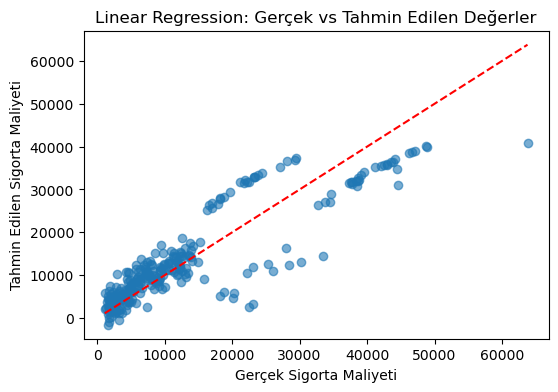

In [17]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, lr_pred, alpha=0.6)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color="red",
    linestyle="--"
)
plt.xlabel("Gerçek Sigorta Maliyeti")
plt.ylabel("Tahmin Edilen Sigorta Maliyeti")
plt.title("Linear Regression: Gerçek vs Tahmin Edilen Değerler")
plt.show()


Grafik incelendiğinde, tahmin edilen değerlerin gerçek değerlere tam olarak
örtüşmediği ve özellikle yüksek maliyetlerde sapmaların arttığı görülmektedir.
Bu durum, doğrusal regresyon modelinin sigorta maliyetlerindeki karmaşık
ilişkileri yakalamakta sınırlı kaldığını göstermektedir.


#### Modelleme – Random Forest Regresyon

Bu bölümde, doğrusal regresyon modelinin sınırlı performansı nedeniyle
daha güçlü bir model olan Random Forest regresyon modeli uygulanmıştır.
Random Forest modeli, değişkenler arasındaki doğrusal olmayan ilişkileri
daha iyi yakalayabilme yeteneğine sahiptir.


In [18]:
rf_model=RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1)

In [19]:
rf_model.fit(x_train, y_train)

RandomForestRegressor(n_estimators=50, n_jobs=-1, random_state=42)

#### Test Verisi Üzeirnde Tahmin

Eğitilen Random Forest modeli kullanılarak test verisi üzerinde tahminler gerçekleştirilmiştir.



In [20]:
rf_pred=rf_model.predict(x_test)

**** Test verisi için sigorta maliyeti tahminleri elde edilmiştir.

#### Model Performansının Değerlendirilmesi

In [21]:
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_pred)

In [22]:
rf_rmse

np.float64(4605.04718780839)

In [23]:
rf_r2

0.863403330911817

Random Forest regresyon modelinde, performans ve hesaplama maliyeti arasında
denge sağlamak amacıyla ağaç sayısı (`n_estimators`) 50 olarak belirlenmiştir.
Bu değer, modelin yeterli doğruluk sağlaması ve eğitim süresinin makul seviyede
kalması açısından tercih edilmiştir.

Modelin daha hızlı eğitilebilmesi için tüm işlemci çekirdeklerinin kullanılmasını
sağlayan `n_jobs=-1` parametresi kullanılmıştır.
Bu sayede model eğitimi paralel olarak gerçekleştirilmiş ve hesaplama süresi azaltılmıştır.

Elde edilen sonuçlara göre, Random Forest modelinin RMSE değeri yaklaşık 4.605,
R² skoru ise yaklaşık 0.86 olarak hesaplanmıştır.
Bu sonuçlar, modelin sigorta maliyetlerini tahmin etmede yüksek doğruluk sağladığını
ve doğrusal regresyon modeline kıyasla daha başarılı bir performans sergilediğini göstermektedir.


#### Random Forest Regresyon – Gerçek ve Tahmin Edilen Değerlerin Karşılaştırılması

Random Forest regresyon modeli tarafından tahmin edilen sigorta maliyetleri ile
gerçek değerler karşılaştırılarak modelin tahmin başarısı görsel olarak incelenmiştir.
Bu grafik, model performansının daha net anlaşılması amacıyla oluşturulmuştur.


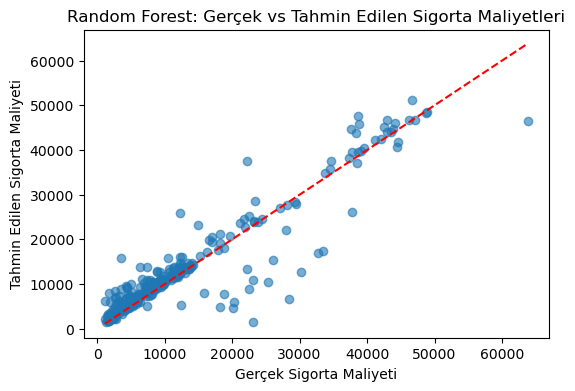

In [24]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, rf_pred, alpha=0.6)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color="red",
    linestyle="--"
)
plt.xlabel("Gerçek Sigorta Maliyeti")
plt.ylabel("Tahmin Edilen Sigorta Maliyeti")
plt.title("Random Forest: Gerçek vs Tahmin Edilen Sigorta Maliyetleri")
plt.show()


Grafik incelendiğinde, Random Forest modelinin tahminlerinin büyük ölçüde
gerçek değerlere yakın olduğu görülmektedir.
Tahminlerin referans çizgisi etrafında yoğunlaşması, modelin
sigorta maliyetlerini başarılı bir şekilde tahmin ettiğini göstermektedir.


# SONUÇ

Bu çalışmada, bireylerin demografik ve sağlıkla ilgili özellikleri kullanılarak
yıllık sağlık sigortası maliyetlerinin tahmin edilmesi amaçlanmıştır.
Veri analizi, ön işleme, modelleme ve değerlendirme adımları uçtan uca uygulanmıştır.

Doğrusal regresyon ve Random Forest regresyon modelleri karşılaştırılmış,
Random Forest modelinin daha düşük hata oranı ve daha yüksek açıklayıcılık sağladığı görülmüştür.
Elde edilen sonuçlar, Random Forest modelinin sigorta maliyetlerini tahmin etmede
başarılı ve güvenilir bir yaklaşım sunduğunu göstermektedir.

## Gerçek Hayatta Kullanım Senaryosu

Bu projede geliştirilen sigorta maliyeti tahmin modeli,
sigorta şirketleri tarafından bireysel risk analizi ve fiyatlandırma süreçlerinde kullanılabilir.
Bireylerin yaş, sağlık durumu ve yaşam tarzı bilgileri kullanılarak,
sigorta primleri daha adil ve veri odaklı bir şekilde belirlenebilir.

Ayrıca, bu tür bir model müşteri segmentasyonu,
riskli müşteri gruplarının belirlenmesi ve maliyet optimizasyonu gibi
karar destek sistemlerinde de etkin bir şekilde kullanılabilir.


In [25]:
dir()

['In',
 'LinearRegression',
 'Out',
 'RandomForestRegressor',
 '_',
 '_12',
 '_15',
 '_16',
 '_19',
 '_22',
 '_23',
 '_3',
 '_4',
 '_5',
 '_6',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__session__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i13',
 '_i14',
 '_i15',
 '_i16',
 '_i17',
 '_i18',
 '_i19',
 '_i2',
 '_i20',
 '_i21',
 '_i22',
 '_i23',
 '_i24',
 '_i25',
 '_i3',
 '_i4',
 '_i5',
 '_i6',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'df',
 'df_encoded',
 'exit',
 'get_ipython',
 'lr_model',
 'lr_mse',
 'lr_pred',
 'lr_r2',
 'lr_rmse',
 'mean_squared_error',
 'np',
 'open',
 'pd',
 'plt',
 'quit',
 'r2_score',
 'rf_model',
 'rf_mse',
 'rf_pred',
 'rf_r2',
 'rf_rmse',
 'sns',
 'train_test_split',
 'x',
 'x_test',
 'x_train',
 'y',
 'y_test',
 'y_train']

In [26]:
import joblib

joblib.dump(lr_model, "insurance_linear_regression.pkl")
joblib.dump(rf_model, "insurance_random_forest.pkl")


['insurance_random_forest.pkl']

In [27]:
!ls

'archive(2).zip'		   insurance_random_forest.pkl
 insurance.csv			   MedicalInsuranceCostPrediction.ipynb
 insurance_linear_regression.pkl   README.md.txt


In [28]:
!pip freeze > requirements.txt